In [1]:
# <https://2012.cccg.ca/papers/paper13.pdf>.

import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
EPS = 1e-9
RT_3 = 3 ** 0.5

def close(x1, x2):
    return abs(x1 - x2) < EPS


def close(xy1, xy2):
    return abs(xy1[0] - xy2[0]) < EPS and abs(xy1[1] - xy2[1]) < EPS


def dist(xy1, xy2):
    return ((xy1[0] - xy2[0]) ** 2 + (xy1[1] - xy2[1]) ** 2) ** 0.5

In [3]:
def to_hex_coords(x, y):
    return y / (2 * RT_3) + x / 2, y / (2 * RT_3) - x / 2


def to_cart_coords(r, c):
    return r - c, RT_3 * (r + c)

In [4]:
to_hex_coords(0, 0)  # 0, 0.

(0.0, 0.0)

In [5]:
to_hex_coords(2, 0)  # 1, -1.

(1.0, -1.0)

In [6]:
to_hex_coords(1, RT_3)  # 1, 0.

(1.0, 0.0)

In [7]:
print(rc := to_hex_coords(1, 2))  # 1 + C, C.
print(to_cart_coords(*rc))  # 1, 2.

(1.0773502691896257, 0.07735026918962584)
(0.9999999999999999, 1.9999999999999998)


In [8]:
def is_hex_shift_cover(shift, pts):
    for pt in pts:
        r, c = to_hex_coords(pt[0] - shift[0], pt[1] - shift[1])
        close_rc = [
            (math.floor(r), math.floor(c)),
            (math.floor(r), math.ceil(c)),
            (math.ceil(r), math.floor(c)),
            (math.ceil(r), math.ceil(c))
        ]
        close_xy = [to_cart_coords(*rc) for rc in close_rc]
        # print((r, c), close_rc)
        dists = [dist(xy,(pt[0] - shift[0], pt[1] - shift[1]))
            for xy in close_xy]
        md = np.min(dists)
        if md > 1:
            return False
        
    return True

In [9]:
is_hex_shift_cover((0, 0), [(0, 0)])  # True.

True

In [10]:
is_hex_shift_cover((0, 0), [(1, RT_3 / 3)])  # False.

False

In [11]:
is_hex_shift_cover((1, RT_3 / 3), [(0, 0)])  # False.

False

In [12]:
is_hex_shift_cover((-1, -RT_3 / 3), [(0, 0)])  # False.

False

In [28]:
def calc_hex_shift_covers(pts):
    covers = []
    for x in np.arange(-1, 1, 0.01):
        for y in np.arange(-2 * RT_3 / 3, 2 * RT_3 / 3, 0.01):
            # if y > RT_3 * x or y > -RT_3 * x + 2 * RT_3:
                # continue
            if is_hex_shift_cover((x, y), pts):
                covers.append((x, y))
    return np.array(covers)


def graph_covers(covers):
    if len(covers) == 0:
        print("No cover!")
        return
    plt.scatter(covers[:, 0], covers[:, 1], s=0.1)
    plt.xlim(-1, 1)
    plt.ylim(-2 / 3 * RT_3, 2 / 3 * RT_3)

(41091, 2)


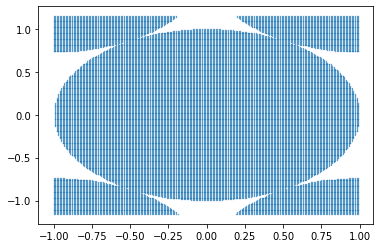

In [14]:
print((covers := calc_hex_shift_covers([(0, 0)])).shape)
graph_covers(covers)  # Triangle.

(41091, 2)


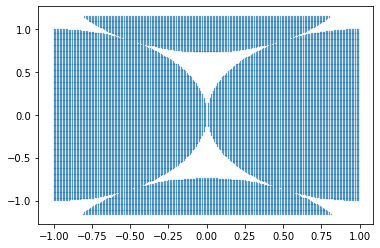

In [15]:
print((covers := calc_hex_shift_covers([(1, 0)])).shape)
graph_covers(covers)  # Triangle with bikini cutout.

(42668, 2)


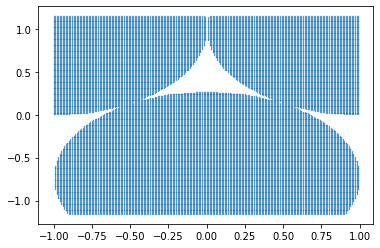

In [16]:
print((covers := calc_hex_shift_covers([(1, 1)])).shape)
graph_covers(covers)  # Triangle with inverse bikini cutout.

(35982, 2)


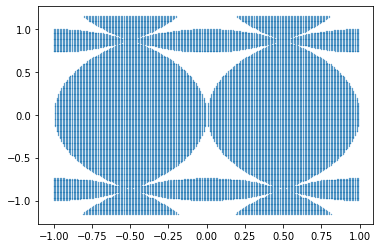

In [17]:
print((covers := calc_hex_shift_covers([(0, 0), (1, 0)])).shape)
graph_covers(covers)

(32579, 2)


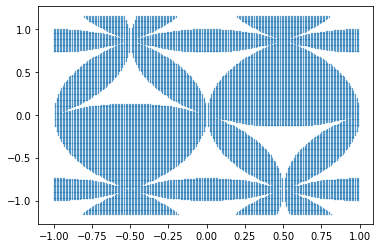

In [18]:
print((covers := calc_hex_shift_covers([(0, 0), (1, 0), (0.5, 0.5 * RT_3)])).shape)
graph_covers(covers)

In [29]:
print((covers := calc_hex_shift_covers([
    ((i % 4) * 0.25, i // 4) for i in range(36)
])).shape)
graph_covers(covers)

(0,)
No cover!


(90, 2)


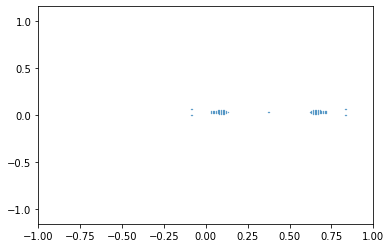

In [30]:
print((covers := calc_hex_shift_covers([
    ((i % 4) * 0.25, i // 4) for i in range(32)
])).shape)
graph_covers(covers)

(46, 2)


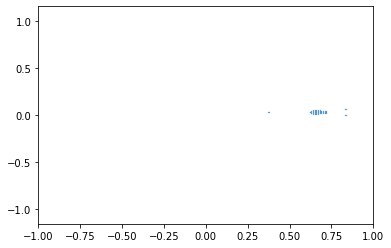

In [31]:
print((covers := calc_hex_shift_covers([
    ((i % 4) * 0.25, i // 4) for i in range(33)
])).shape)
graph_covers(covers)

(44, 2)


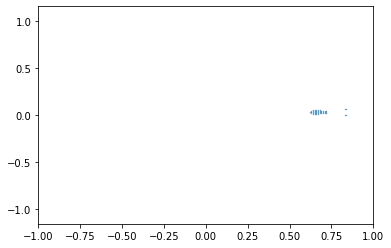

In [32]:
print((covers := calc_hex_shift_covers([
    ((i % 4) * 0.25, i // 4) for i in range(34)
])).shape)
graph_covers(covers)

(4, 2)


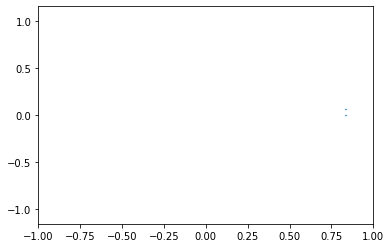

In [33]:
print((covers := calc_hex_shift_covers([
    ((i % 4) * 0.25, i // 4) for i in range(35)
])).shape)
graph_covers(covers)